<a href="https://colab.research.google.com/github/14marcos1/Geral01/blob/main/elt575_semana2_51687_02_02_2026_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Shape x_train: (50000, 32, 32, 3)
Shape y_train: (50000, 10)
Shape x_test : (10000, 32, 32, 3)
Shape y_test : (10000, 10)


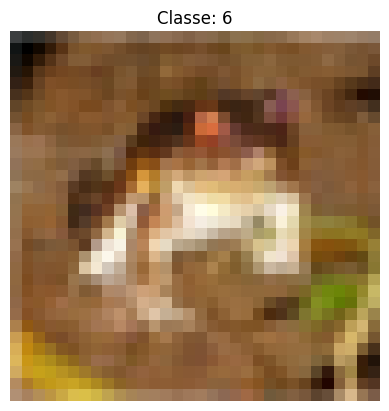

In [1]:
# ===============================
# 1. Importação de bibliotecas
# ===============================
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# ===============================
# 2. Carregamento do dataset CIFAR-10
# ===============================
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# ===============================
# 3. Normalização das imagens
# ===============================
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# ===============================
# 4. One-hot encoding dos rótulos
# ===============================
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# ===============================
# 5. Verificação rápida
# ===============================
print("Shape x_train:", x_train.shape)
print("Shape y_train:", y_train.shape)
print("Shape x_test :", x_test.shape)
print("Shape y_test :", y_test.shape)

# Visualizar uma imagem de exemplo
plt.imshow(x_train[0])
plt.title("Classe: {}".format(np.argmax(y_train[0])))
plt.axis("off")
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.2201 - loss: 2.1476 - val_accuracy: 0.3396 - val_loss: 1.8689
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3556 - loss: 1.8381 - val_accuracy: 0.3987 - val_loss: 1.7311
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4051 - loss: 1.6923 - val_accuracy: 0.4280 - val_loss: 1.6317
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4401 - loss: 1.5809 - val_accuracy: 0.4504 - val_loss: 1.5459
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4740 - loss: 1.4891 - val_accuracy: 0.4960 - val_loss: 1.4493
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5041 - loss: 1.4102 - val_accuracy: 0.4965 - val_loss: 1.4225
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5304 - loss: 1.3393 - val_accuracy: 0.5323 - val_loss: 1.3412
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5443 - loss: 1.2866 - val_accuracy: 0.

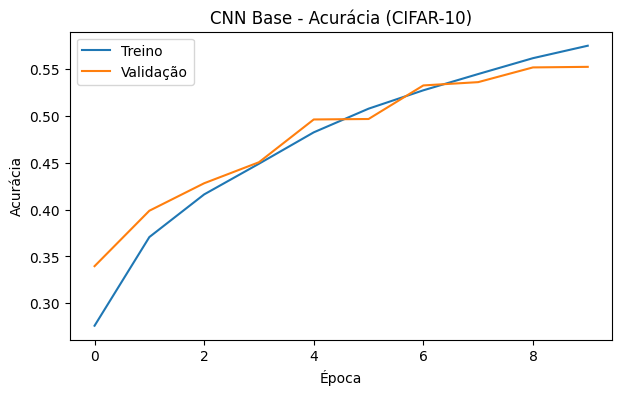

In [2]:
# ===============================
# 2. Modelo CNN base (CIFAR-10)
# ===============================
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# (opcional) nomes das classes para depois interpretar resultados
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# Definição do modelo (igual ao exemplo, mas com input 32x32x3)
model_base = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

# Compilação (SGD + entropia cruzada categórica + acurácia)
model_base.compile(
    optimizer=SGD(),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Resumo do modelo (para colocar no relatório)
model_base.summary()

# Treinamento
history_base = model_base.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# Avaliação no teste
test_loss, test_acc = model_base.evaluate(x_test, y_test, verbose=0)
print(f"\nTeste - Loss: {test_loss:.4f} | Accuracy: {test_acc:.4f}")

# Curvas de aprendizado (treino vs validação)
plt.figure(figsize=(7,4))
plt.plot(history_base.history["accuracy"], label="Treino")
plt.plot(history_base.history["val_accuracy"], label="Validação")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.title("CNN Base - Acurácia (CIFAR-10)")
plt.legend()
plt.show()


“Sim. O desempenho foi significativamente inferior ao exemplo original, pois o CIFAR-10 apresenta maior complexidade visual. O modelo base mostrou limitações de capacidade, caracterizando underfitting.”

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,506 (353.54 KB)

 Trainable params: 90,506 (353.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2599 - loss: 1.9589 - val_accuracy: 0.4799 - val_loss: 1.4270
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4891 - loss: 1.4098 - val_accuracy: 0.5703 - val_loss: 1.2453
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5473 - loss: 1.2652 - val_accuracy: 0.5989 - val_loss: 1.1435
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5802 - loss: 1.1725 - val_accuracy: 0.6006 - val_loss: 1.1340
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6065 - loss: 1.1006 - val_accuracy: 0.6587 - val_loss: 0.9867
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6352 - loss: 1.0466 - val_accuracy: 0.6656 - val_loss: 0.9609
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6470 - loss: 0.9977 - val_accuracy: 0.6664 - val_loss: 0.9479
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6595 - loss: 0.9648 - val_accuracy: 0.

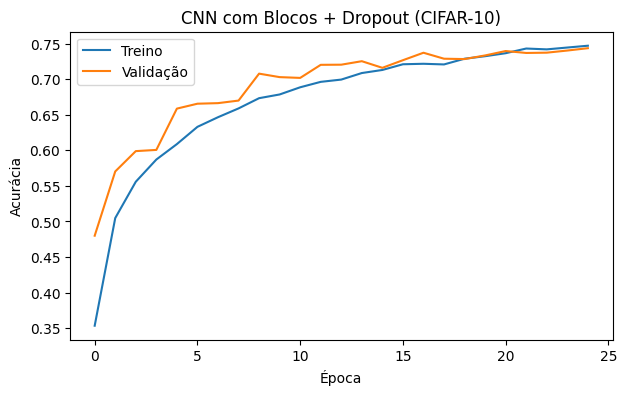

In [3]:
# ==========================================
# 4. CNN com blocos convolucionais + Dropout
# ==========================================
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam # Adam costuma performar melhor que SGD para CIFAR-10

model_dropout = Sequential([
    # Bloco 1: Base
    Conv2D(32, (3,3), activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D((2,2)),
    Dropout(0.2), # Primeiro Dropout solicitado

    # Bloco 2: Adicional (64 filtros)
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Dropout(0.2), # Segundo Dropout solicitado

    # Bloco 3: Adicional (64 filtros)
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Dropout(0.2), # Terceiro Dropout solicitado

    Flatten(),
    Dense(128, activation="relu"), # Aumentado para 128 para melhor capacidade de processamento
    Dense(10, activation="softmax")
])

# Compilação
# Dica: troquei SGD por Adam para acelerar a convergência e melhorar a acurácia final
model_dropout.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model_dropout.summary()

# Treinamento
# Recomendado aumentar epochs para 20 ou 30 para o modelo aprender os novos blocos
history_dropout = model_dropout.fit(
    x_train, y_train,
    epochs=25,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# Avaliação
test_loss_d, test_acc_d = model_dropout.evaluate(x_test, y_test, verbose=0)
print(f"\nTeste - Loss: {test_loss_d:.4f} | Accuracy: {test_acc_d:.4f}")

# Curvas de aprendizado
plt.figure(figsize=(7,4))
plt.plot(history_dropout.history["accuracy"], label="Treino")
plt.plot(history_dropout.history["val_accuracy"], label="Validação")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.title("CNN com Blocos + Dropout (CIFAR-10)")
plt.legend()
plt.show()


In [8]:
from tensorflow.keras import layers, models, callbacks

# Modelo "Fast & Efficient"
model_fast = models.Sequential([
    layers.Input(shape=(32, 32, 3)),

    # Bloco 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(), # Acelera o aprendizado drasticamente
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # Bloco 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    # Bloco 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Otimizador Adam com taxa de aprendizado ligeiramente maior para rapidez
model_fast.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callback para parar o treino assim que atingir o objetivo ou parar de melhorar
# Isso economiza tempo se o modelo chegar em 80% antes da época 30
stop_callback = callbacks.EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True)

print("Iniciando treinamento rápido...")
history_fast = model_fast.fit(
    x_train, y_train,
    epochs=30, # Reduzido para 30 épocas (com Batch Normalization é suficiente)
    batch_size=128, # Aumentado para 128 para processar mais rápido por época
    validation_split=0.2,
    callbacks=[stop_callback],
    verbose=1
)

Iniciando treinamento rápido...
Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.3074 - loss: 2.2376 - val_accuracy: 0.1036 - val_loss: 4.0739
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4956 - loss: 1.3940 - val_accuracy: 0.4260 - val_loss: 1.6108
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5724 - loss: 1.1998 - val_accuracy: 0.6339 - val_loss: 1.0605
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6139 - loss: 1.0910 - val_accuracy: 0.6521 - val_loss: 0.9899
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6400 - loss: 1.0241 - val_accuracy: 0.5624 - val_loss: 1.2605
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6656 - loss: 0.9621 - val_accuracy: 0.6378 - val_loss: 1.0062
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6768 - loss: 0.9223 - val_accuracy: 0.6788 - val_loss: 0.9110
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.68

In [9]:
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Configuração de Data Augmentation
# Isso cria variações das imagens para que a rede nunca veja a mesma imagem igual duas vezes
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

# 2. Arquitetura de Alto Desempenho (Deep CNN)
model_85 = models.Sequential([
    # Bloco 1: Convoluções Duplas
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # Bloco 2: Aumento de filtros
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    # Bloco 3: Profundidade máxima
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# 3. Compilação
model_85.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Callbacks Inteligentes
# ReduceLROnPlateau reduz a taxa de aprendizado quando o ganho estagna
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stop = callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

# 5. Treinamento com Data Augmentation (Requer mais épocas devido à complexidade extra)
batch_size = 64
history_85 = model_85.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=100, # O aumento de dados requer mais tempo, mas o resultado é superior
    validation_data=(x_test, y_test),
    callbacks=[reduce_lr, early_stop],
    verbose=1
)

Epoch 1/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 53s 55ms/step - accuracy: 0.3186 - loss: 2.1328 - val_accuracy: 0.4887 - val_loss: 1.4708 - learning_rate: 0.0010
Epoch 2/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4375 - loss: 1.4534 - val_accuracy: 0.4900 - val_loss: 1.4742 - learning_rate: 0.0010
Epoch 3/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.5346 - loss: 1.2966 - val_accuracy: 0.5320 - val_loss: 1.6338 - learning_rate: 0.0010
Epoch 4/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5469 - loss: 1.1890 - val_accuracy: 0.5180 - val_loss: 1.8133 - learning_rate: 0.0010
Epoch 5/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.6047 - loss: 1.1075 - val_accuracy: 0.6258 - val_loss: 1.0656 - learning_rate: 0.0010
Epoch 6/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6875 - loss: 1.0097 - val_accuracy: 0.6322 - val_loss: 1.0437 - learning_rate: 0.0010
Epoch 7/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.6511 - 